Importing libraries

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns       
import numpy as np
!pip install impyute
import impyute as impy
%matplotlib inline

Investigating Data


In [33]:
df = pd.read_csv('tmdb-movies.csv')

In [36]:
df.info() # column names, entries, data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [47]:
df.head #first and last 5 rows of dataset

<bound method NDFrame.head of            id    imdb_id  popularity  ...  release_year    budget_adj   revenue_adj
0      135397  tt0369610   32.985763  ...          2015  1.379999e+08  1.392446e+09
1       76341  tt1392190   28.419936  ...          2015  1.379999e+08  3.481613e+08
2      262500  tt2908446   13.112507  ...          2015  1.012000e+08  2.716190e+08
3      140607  tt2488496   11.173104  ...          2015  1.839999e+08  1.902723e+09
4      168259  tt2820852    9.335014  ...          2015  1.747999e+08  1.385749e+09
...       ...        ...         ...  ...           ...           ...           ...
10861      21  tt0060371    0.080598  ...          1966  0.000000e+00  0.000000e+00
10862   20379  tt0060472    0.065543  ...          1966  0.000000e+00  0.000000e+00
10863   39768  tt0060161    0.065141  ...          1966  0.000000e+00  0.000000e+00
10864   21449  tt0061177    0.064317  ...          1966  0.000000e+00  0.000000e+00
10865   22293  tt0060666    0.035919  ...     

In [48]:
df.tail(3) #returns last n rows

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,fire|gun|drive|sacrifice|flashlight,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [46]:
df.describe() #count, mean, std, min, max, percentile

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [51]:
df.nunique() #number of unique values in each column

popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
director                 5067
tagline                  7997
keywords                 8804
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

Data cleaning process by filling null values with mean and also drop duplicate data


In [55]:
df.drop(['id','imdb_id','homepage','overview'], axis=1, inplace=True) #if inplace=False, it returns a copy, otherwise makes changes in same variable
df.shape # shows number of rows and columns
#df.info()


(10866, 17)

In [52]:
df.isnull().sum()  # sum of null values in each column

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
tagline                 2824
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [58]:
#drop rows with at least 1 null value 
df = df.dropna()
#drop rows with all values = null
#dfnew = df.dropna(how='all') 

In [61]:
df.shape 

(7032, 17)

In [87]:
#count the number of zeroes per column
df.isin(values=[0]).sum()

popularity                 0
budget                  2766
revenue                 2855
original_title             0
cast                       0
director                   0
tagline                    0
keywords                   0
runtime                    3
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              2766
revenue_adj             2855
dtype: int64

In [88]:
#populate zero values with column mean
df['budget']=df['budget'].replace(0,df['budget'].mean())
df['revenue']=df['revenue'].replace(0,df['revenue'].mean())
df['budget_adj']=df['budget_adj'].replace(0,df['budget_adj'].mean())
df['revenue_adj']=df['revenue_adj'].replace(0,df['revenue_adj'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Visualize

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0d8080350>,
      dtype=object)

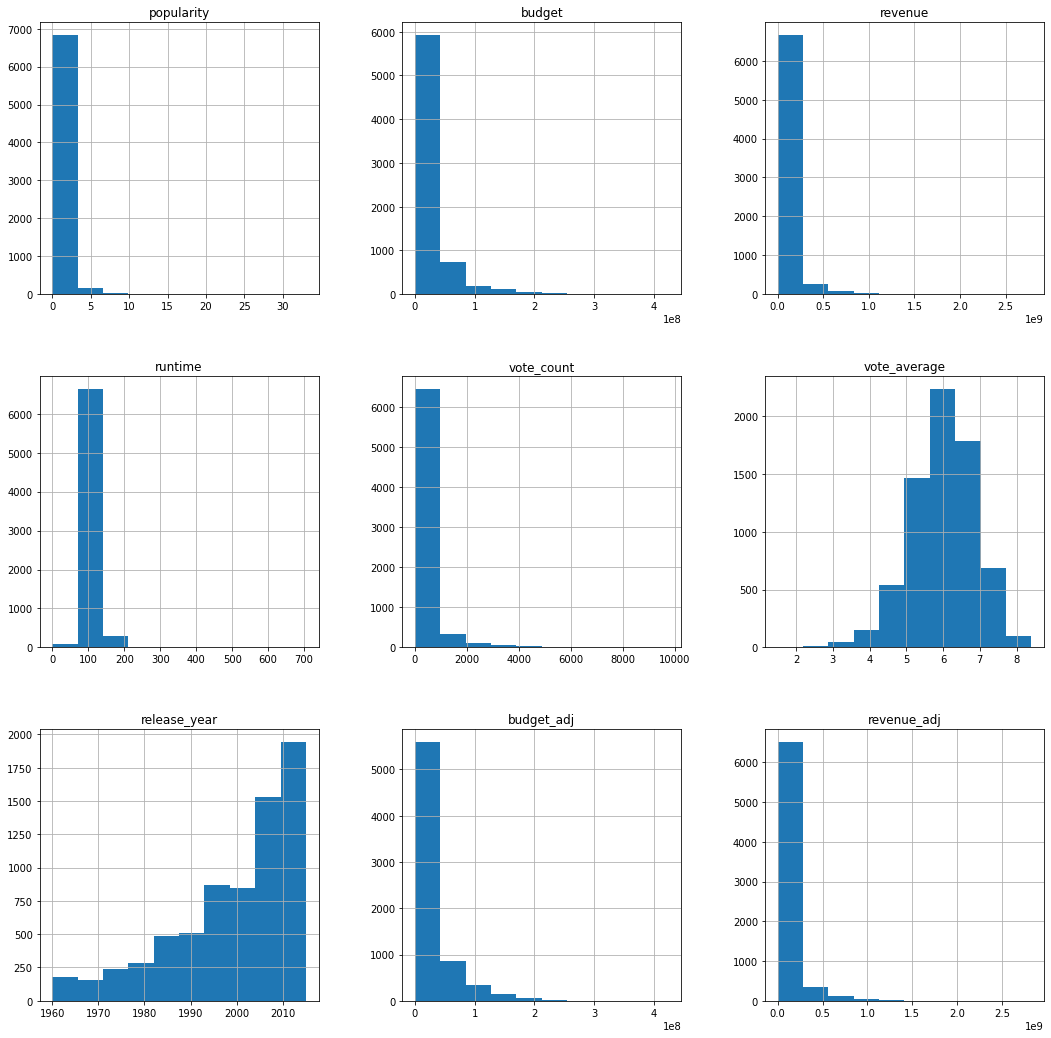

In [90]:
df.hist(figsize=(18,18))

Question 1:
Does higher budget mean higher popularity?

Text(0, 0.5, 'Popularity')

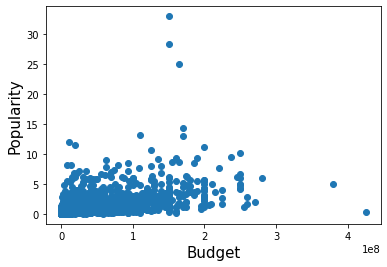

In [11]:
budget = df['budget']
nonzeroBudget = df[df['budget']>0].index.tolist()
budget_nozeroes = df['budget'][nonzeroBudget]
pop_nozeroes = df['popularity'][nonzeroBudget]
popularity = df['popularity']
plt.scatter(budget_nozeroes, pop_nozeroes)
plt.xlabel("Budget", fontsize = 15)
plt.ylabel("Popularity", fontsize = 15)

In [14]:
budget_median = df['budget'].median()
print(budget_median)
budget_nozeroes_median = budget_nozeroes.median()
print(budget_nozeroes_median)
above = df[df['budget']>budget_median].index.tolist()
above_nonzero = budget_nozeroes[budget_nozeroes>budget_nozeroes_median].index.tolist()
below = df[df['budget']<=budget_median].index.tolist()
below_nonzero =  budget_nozeroes[budget_nozeroes<=budget_nozeroes_median].index.tolist()

0.0
20000000.0


In [15]:
pop_above = df['popularity'][above].mean()
pop_below = df['popularity'][below].mean()
print(pop_above,pop_below)
pop_above_nonzero = pop_nozeroes[above_nonzero].mean()
pop_below_nonzero =  pop_nozeroes[below_nonzero].mean()
print(pop_above_nonzero, pop_below_nonzero)

1.1381994911830735 0.3398957946887488
1.6498098228609628 0.6666227467652495


Bar chart

Text(0, 0.5, 'Mean Popularity')

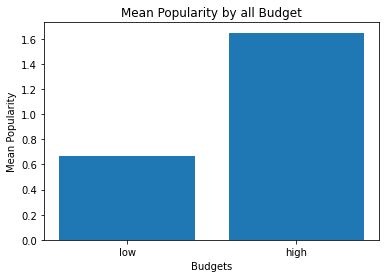

In [16]:
locations = [1,2]
heights = [pop_below_nonzero , pop_above_nonzero]
labels=['low','high']
plt.bar(locations, heights, tick_label = labels)
plt.title('Mean Popularity by all Budget')
plt.xlabel('Budgets')
plt.ylabel('Mean Popularity')

Question 2: Does runtime affect vote count and popularity?

Text(0, 0.5, 'Popularity')

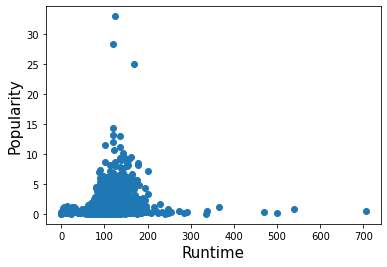

In [93]:
runtime = df['runtime']
popularity = df['popularity']
vote = df['vote_count']
plt.scatter(runtime, popularity)
plt.xlabel("Runtime", fontsize = 15)
plt.ylabel("Popularity", fontsize = 15)

Text(0, 0.5, 'Vote Count')

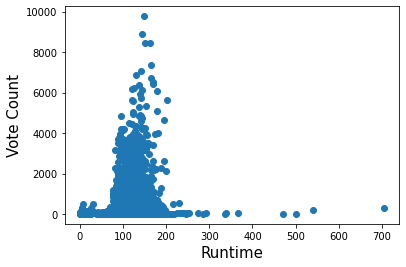

In [94]:
plt.scatter(runtime,vote)
plt.xlabel("Runtime", fontsize = 15)
plt.ylabel("Vote Count", fontsize = 15)

In [98]:
conditions = [(df['runtime'] <= 50), (df['runtime'] > 50) & (df['runtime'] <= 100), (df['runtime']>100) & (df['runtime'] <=150), 
              (df['runtime']>150) & (df['runtime']<=200), (df['runtime']>200) & (df['runtime']<=250), (df['runtime']>250)]
              

In [99]:
values = ['upto 50', '50-100','100-150','150-200','200-250','over 250']

In [101]:
df['runtime_buckets'] = np.select(conditions,values )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [110]:
voteMeans = df['vote_count'].groupby(df['runtime_buckets']).mean()
print(voteMeans)

runtime_buckets
100-150      417.292770
150-200     1056.358382
200-250      475.400000
50-100       175.640561
over 250      75.636364
upto 50       90.400000
Name: vote_count, dtype: float64


In [111]:
popMeans = df['popularity'].groupby(df['runtime_buckets']).mean()
print(popMeans)

runtime_buckets
100-150     1.002512
150-200     1.797530
200-250     0.909495
50-100      0.616865
over 250    0.423883
upto 50     0.463000
Name: popularity, dtype: float64


Text(0, 0.5, 'Average Popularity')

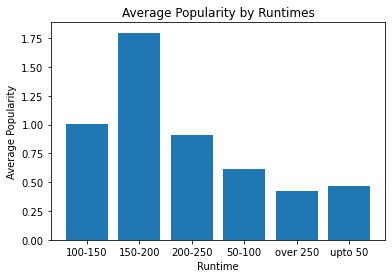

In [155]:
locations = [1,2,3,4,5,6]
heights = popMeans
labels=['100-150','150-200','200-250','50-100','over 250','upto 50']
plt.bar(locations, heights, tick_label = labels)
plt.title('Average Popularity by Runtimes')
plt.xlabel('Runtime')
plt.ylabel('Average Popularity')

Text(0, 0.5, 'Average Vote Count')

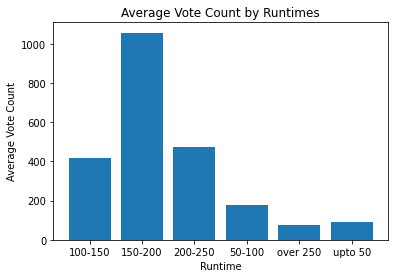

In [156]:
locations = [1,2,3,4,5,6]
heights = voteMeans
labels=['100-150','150-200','200-250','50-100','over 250','upto 50']
plt.bar(locations, heights, tick_label = labels)
plt.title('Average Vote Count by Runtimes')
plt.xlabel('Runtime')
plt.ylabel('Average Vote Count')

Popularity and vote count peak at runtime between 100-150 minutes, and fall as runtime goes beyond it

Question 3: Does higher popularity mean higher profits?

In [116]:
df['profits'] = df['revenue'] - df['budget']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


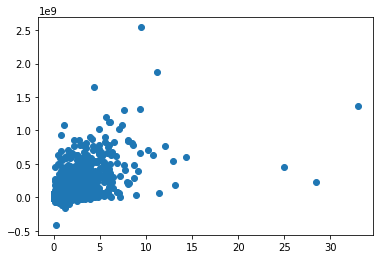

In [119]:
plt.scatter(x=df['popularity'],y=df['profits'])

In [130]:
df['popularity'].describe()

count    7032.000000
mean        0.829463
std         1.180185
min         0.000188
25%         0.278573
50%         0.506241
75%         0.956217
max        32.985763
Name: popularity, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0d186f6d0>]],
      dtype=object)

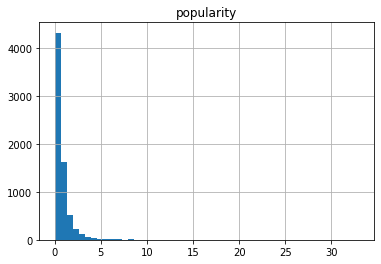

In [131]:
df.hist(column = 'popularity',bins = 50)

In [149]:
popularityConditions = [(df['popularity'] <= 1.5), (df['popularity'] > 1.5) & (df['popularity'] <= 3), (df['popularity']>3)]

In [150]:
popularityValues = ['Unpopular','Fairly Popular','Popular']

In [151]:
df['popularity_buckets'] = np.select(popularityConditions,popularityValues )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [152]:
profitMeans = df['profits'].groupby(df['popularity_buckets']).mean()
print(profitMeans)

popularity_buckets
Fairly Popular    1.384636e+08
Popular           3.571874e+08
Unpopular         3.338213e+07
Name: profits, dtype: float64


Text(0, 0.5, 'Average Profits')

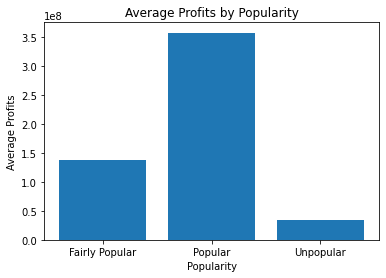

In [153]:
locations = [1,2,3]
heights = profitMeans
labels=['Fairly Popular','Popular','Unpopular']
plt.bar(locations, heights, tick_label = labels)
plt.title('Average Profits by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Average Profits')

Greater popularity indicates greater profit on average

Question 4: What are the Features Associate with Top 10 Revenue Movies ?

In [157]:
sortedDF = df.sort_values(by = 'revenue')

In [168]:
sortedDF = sortedDF.head(10)

       popularity        budget  ...       profits popularity_buckets
8142     0.552091  6.000000e+06  ... -5.999998e+06          Unpopular
10607    0.621476  2.084426e+07  ... -2.084425e+07          Unpopular
1380     0.097126  2.084426e+07  ... -2.084425e+07          Unpopular
8226     0.183034  6.400000e+06  ... -6.399994e+06          Unpopular
8328     0.291459  2.084426e+07  ... -2.084425e+07          Unpopular
2252     0.559371  2.084426e+07  ... -2.084425e+07          Unpopular
8235     0.105894  6.000000e+00  ...  5.000000e+00          Unpopular
7158     0.420568  2.300000e+07  ... -2.299999e+07          Unpopular
9390     0.313071  2.084426e+07  ... -2.084424e+07          Unpopular
10294    0.504169  3.000000e+06  ... -2.999985e+06          Unpopular

[10 rows x 20 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0d0f792d0>,
      dtype=object)

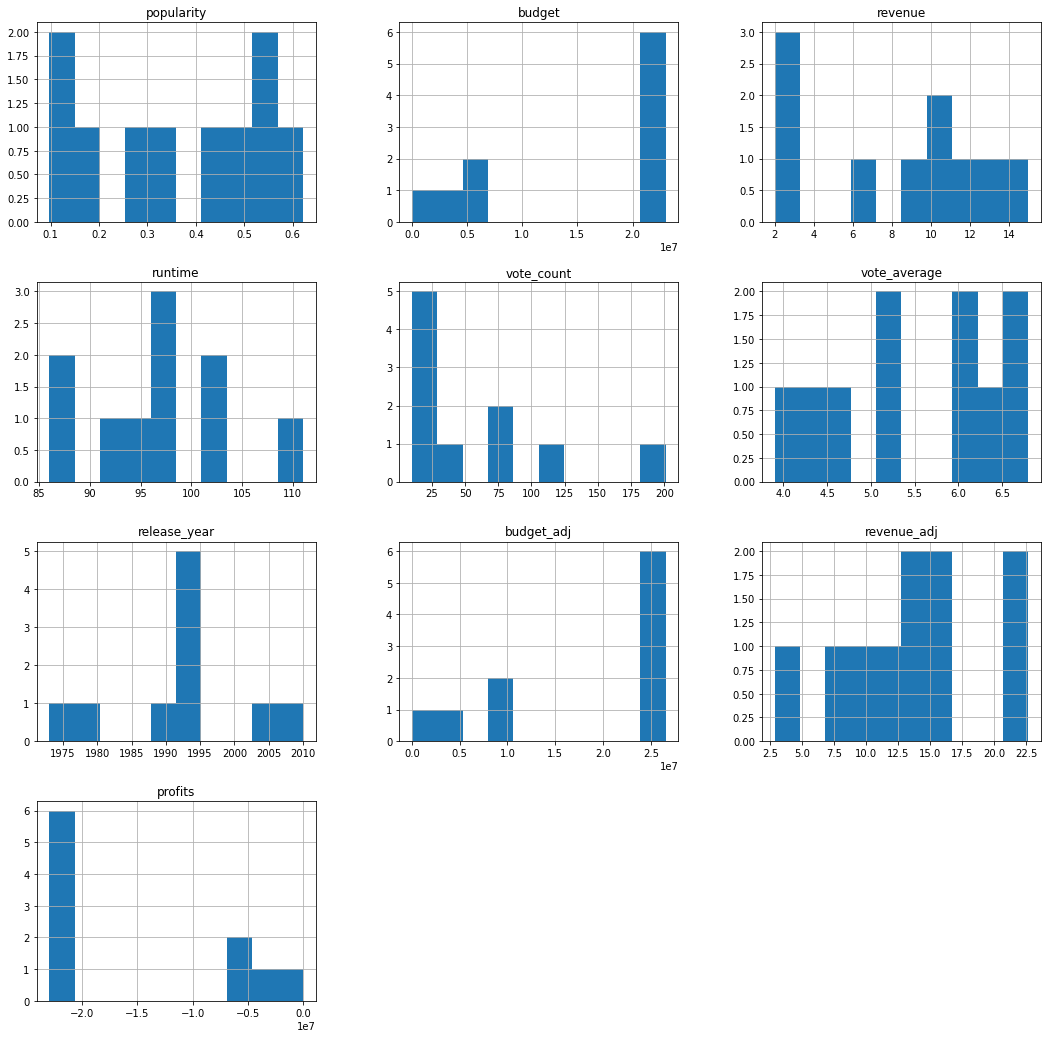

In [162]:
sortedDF.hist(figsize=(18,18))

In [163]:
sortedDF.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


popularity      3.648259e-01
budget          1.426213e+07
revenue         8.400000e+00
runtime         9.670000e+01
vote_count      6.100000e+01
vote_average    5.470000e+00
release_year    1.992500e+03
budget_adj      1.738721e+07
revenue_adj     1.340110e+01
profits        -1.426212e+07
dtype: float64

The top-10 revenue grossing movies are Soylent Green, The Sentinel, Never Talk to Strangers, Gladiator, Elektra Luxx, Tales from the Hood,Chasing Liberty, Drop Dead Fred, and Jason Goes to Hell: The Final Friday.
